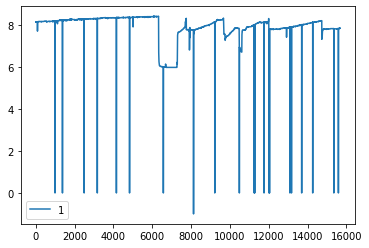

(15682, 2)


In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd

file="dataPH.18786.txt"


noiseP=-30
noiseN=5

smoothP=-30
smoothN=15

baseP=-30
baseN=5

nowP=-10
nowN=5

threshold=0.2

series=read_csv(file, sep="\t", header=None,parse_dates=True)
series=series.values
series


series2 = pd.DataFrame(series)
series2.plot()
pyplot.show()

print(series.shape)

In [2]:
list(reversed(range(1,6)))

[5, 4, 3, 2, 1]

['06/08/2021 02:00:00' '06/08/2021 02:00:03' '06/08/2021 02:00:06' ...
 '06/08/2021 13:33:00' '06/08/2021 13:33:02' '06/08/2021 13:33:05']
[1623110400.0 1623110403.0 1623110406.0 ... 1623151980.0 1623151982.0
 1623151985.0]


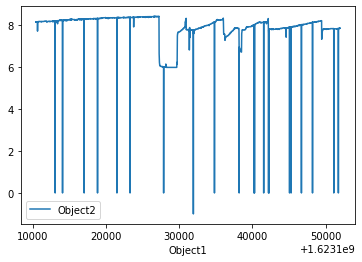

In [3]:
from datetime import datetime

print((series[:,0]))

for i in series:
    i[0]=datetime.strptime(i[0], '%m/%d/%Y %H:%M:%S').timestamp()

print((series[:,0]))

series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

In [4]:
def getSubWindow(v,i,incT):
    t0=v[i][0]
    ret=[]
    if(incT>0):
        for j in range(i+1,len(v)):
            if(v[j][0]<= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    else:
        for j in reversed(range(0,i-1)):
            if(v[j][0]>= t0+incT):
                if(v[j][1]>=0):
                    ret.append(v[j][1])
            else:
                 return ret
    return ret       

In [5]:
getSubWindow(series,11,-5)

def avg(lst):
    if(len(lst)==0):
        return -1
    return sum(lst) / len(lst)

print(getSubWindow(series,11,-15))
print(avg(getSubWindow(series,11,-15)))




[8.15, 8.15, 8.16, 8.16]
8.155000000000001


In [6]:
def getSubWindowFP(v,i,incTF, incTP):
    return getSubWindow(v,i,incTF)+(getSubWindow(v,i,incTP))

getSubWindowFP(series,11,-5,10)

[8.15, 8.16, 8.15, 8.15]

In [7]:
#Quitamos valores puntuales feos 0,-1
for i in range(0,len(series)):
    if(series[i][1]<=0):
        print(getSubWindowFP(series,i,noiseP,noiseN),avg(getSubWindowFP(series,i,noiseP,noiseN)))
        series[i][1]=avg(getSubWindowFP(series,i,noiseP,noiseN))
        

[8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.18, 8.19] 8.197692307692309
[8.24, 8.24, 8.24, 8.24, 8.24, 8.24, 8.24, 8.24, 8.24, 8.24, 8.21, 8.22] 8.235833333333332
[8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.29, 8.29] 8.298461538461536
[8.32, 8.32, 8.32, 8.32, 8.32, 8.32, 8.32, 8.32, 8.32, 8.32, 8.32, 8.31, 8.32] 8.319230769230767
[8.37, 8.37, 8.37, 8.36, 8.33, 8.35, 8.35, 8.36, 8.35, 8.35, 8.36, 8.37] 8.3575
[8.38, 8.37, 8.37, 8.37, 8.37, 8.37, 8.37, 8.37, 8.37, 8.37, 8.36, 8.37] 8.37
[6.02, 6.01, 6.01, 6.01, 6.01, 6.01, 6.02, 6.02, 6.02, 6.02, 6.02, 6.01, 6.01] 6.014615384615383
[7.77, 7.77, 7.77, 7.77, 7.77, 7.77, 7.77, 7.77, 7.74, 7.76] 7.765999999999998
[8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.16, 8.15, 8.16] 8.159230769230767
[6.77, 6.81, 6.84, 6.87, 6.91, 6.99, 7.23, 7.58, 7.81, 7.85, 6.75, 6.76] 7.0975
[8.02, 8.02, 8.02, 8.02, 8.02, 8.02, 8.02, 8.02, 8.02, 8.02, 8.02, 8.01, 8.02] 8.019230769230766
[8.02, 8.02, 8.02, 8.02, 8.02, 8

In [8]:
print(series)

[[1623110400.0 8.15]
 [1623110403.0 8.15]
 [1623110406.0 8.16]
 ...
 [1623151980.0 7.86]
 [1623151982.0 7.86]
 [1623151985.0 7.86]]


15682


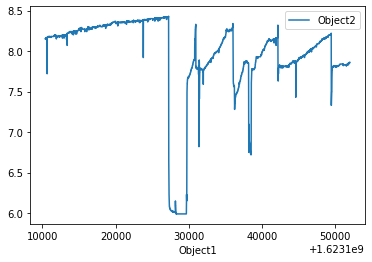

In [9]:
print(len(series))
series2 = pd.DataFrame({'Object1':series[:,0],'Object2':series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

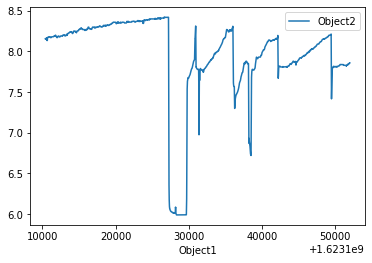

In [10]:
#Quitamos valores puntuales feos 0,-1
avg_series=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_series[i][1]=avg(getSubWindowFP(series,i,smoothP,smoothN))
        avg_series[i][0]=series[i][0]
series2 = pd.DataFrame({'Object1':avg_series[:,0],'Object2':avg_series[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()

2021-06-08 06:40:34
2021-06-08 06:40:37
2021-06-08 06:40:39
2021-06-08 06:40:41
2021-06-08 06:40:44
2021-06-08 06:40:46
2021-06-08 06:40:49
2021-06-08 06:40:51
2021-06-08 06:40:53
2021-06-08 06:40:56
2021-06-08 06:40:58
2021-06-08 06:41:00
2021-06-08 06:41:05
2021-06-08 06:41:07
2021-06-08 06:41:10
2021-06-08 06:41:12
2021-06-08 06:41:14
2021-06-08 07:42:37
2021-06-08 07:42:39
2021-06-08 07:42:42
2021-06-08 07:42:48
2021-06-08 07:49:19
2021-06-08 07:49:24
2021-06-08 07:49:28
2021-06-08 07:49:31
2021-06-08 07:49:33
2021-06-08 07:49:35
2021-06-08 07:49:38
2021-06-08 07:49:40
2021-06-08 07:49:42
2021-06-08 07:50:45
2021-06-08 09:07:27
2021-06-08 09:07:32
2021-06-08 09:07:34
2021-06-08 09:07:37
2021-06-08 09:07:39
2021-06-08 09:42:46
2021-06-08 09:42:51
2021-06-08 09:42:53
2021-06-08 09:42:55
2021-06-08 09:42:57
2021-06-08 09:43:00
2021-06-08 09:43:02
2021-06-08 09:43:05
2021-06-08 09:43:07
2021-06-08 10:49:35
2021-06-08 10:49:37
2021-06-08 10:49:40
2021-06-08 10:49:42
2021-06-08 10:49:45


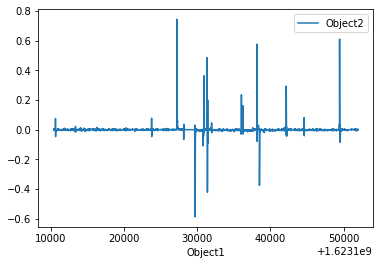

In [11]:
#Computamos bajadas

f = open("ph-down.tsv", "w")

avg_series2=np.zeros((len(series),2))
for i in range(0,len(series)):
        avg_series2[i][1]=avg(getSubWindowFP(series,i,baseP,baseN))-avg(getSubWindowFP(series,i,nowP,nowN))
        avg_series2[i][0]=series[i][0]
        f.write(str(datetime.fromtimestamp(avg_series2[i][0]))+"\t")
        if(avg_series2[i][1]>threshold):
            print( datetime.fromtimestamp(avg_series2[i][0]))
            f.write("1\n")
        else:
            f.write("0\n")
f.close()

series2 = pd.DataFrame({'Object1':avg_series2[:,0],'Object2':avg_series2[:,1]})
series2.plot(x='Object1', y='Object2')
pyplot.show()